In [2]:
import pandas as pd
import numpy as np
import math

DATA_PATH = "/Users/mvonebers/HUBBS-Lab/data/"
#DATA_PATH = "/home/maggie/HUBBS-Lab/data/"

e4_data = pd.read_excel(DATA_PATH + "E4_TEST.xlsx")

e4_data.insert(0, "person", [0] * e4_data.shape[0])
e4_data.insert(1, "trial", [0] * e4_data.shape[0])

for i, row in e4_data.iterrows():
    e4_data.at[i, "person"] = int(e4_data.at[i, "id"][7:])
    e4_data.at[i, "trial"] = int(e4_data.at[i, "id"][5])
    
e4_data = e4_data.drop(columns=['id'])
e4_data = e4_data.rename(columns={"person": "id"})

change_data = pd.read_excel(DATA_PATH + "normalized_change.xlsx")

e4_data_results = pd.merge(e4_data, change_data, on='id')
e4_data_results

ids = set()
for i in range(e4_data.shape[0]):
    ids.add(e4_data.iloc[i, 0])
    
#print(len(ids))
e4_data_results

,id,trial,EDA_PPT,HR_PPT,TEMP_PPT,BVP_PPT,ACC_PPT,IBI_PPT,EDA_FREQ_PPT,EDA_AMP_PPT,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
0,4,1,0.205970,82.376250,31.404085,0.013278,64.812218,0.882853,7.181628,0.012059,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
1,4,2,0.206435,105.666378,31.331652,-0.132812,65.118669,0.859414,7.312119,0.012054,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
2,4,3,0.212655,75.010328,30.183614,-0.111220,64.876459,0.921917,7.685270,0.012726,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
3,4,4,0.191278,92.559115,29.766569,-0.046831,64.844329,1.171929,6.262231,0.010277,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
4,4,5,0.154794,79.935382,29.652207,0.029759,62.817997,1.187555,2.574713,0.010306,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,73,4,2.422543,78.467647,32.132378,-0.054789,65.853056,0.859414,8.862629,0.031206,0.344828,0.125000,0.233333,0.307692,0.222222,0.033333,0.178571,0.000000
156,73,5,0.545086,78.157361,33.548290,-0.043703,65.637811,0.655458,10.471204,0.026741,0.344828,0.125000,0.233333,0.307692,0.222222,0.033333,0.178571,0.000000
157,73,6,0.840680,84.307227,33.130568,-0.046631,65.968021,0.661489,15.984329,0.044909,0.344828,0.125000,0.233333,0.307692,0.222222,0.033333,0.178571,0.000000
158,73,7,0.997170,85.801776,32.511091,-0.058622,66.282949,0.953169,14.677686,0.052215,0.344828,0.125000,0.233333,0.307692,0.222222,0.033333,0.178571,0.000000


In [3]:
"""
Collect all possible slopes (trial 8 - trial 1)
"""
col = ["id", "trial", "EDA_PPT", "HR_PPT", "TEMP_PPT", "BVP_PPT", "ACC_PPT", 
           "IBI_PPT", "EDA_FREQ_PPT", "EDA_AMP_PPT", "Brief fear of Negative Evaluation",
           "CAI Trait Dyadic Score", "CAI Trait Full Score", "CAI Trait Public Speaking Score", 
           "CAI Trait Small group Score", "STAI Trait Score", "CAI State Score", "STAI State Score"]

slopes = pd.DataFrame(np.zeros((160, 18)), columns=col)
slopes = slopes.drop(["trial"], axis=1)
    
first = [0] * 8
for i in range(e4_data_results.shape[0]):
    if e4_data_results.iloc[i, 1] == 1:
        for j in range(2,10):
            first[j - 2] = e4_data_results.iloc[i, j]
    elif e4_data_results.iloc[i, 1] == 8:
        for j in range(2,10):
            #print(i, j)
            slopes.iloc[i, 0] = e4_data_results.iloc[i, 0]
            for k in range(9, 17):
                slopes.iloc[i, k] = e4_data_results.iloc[i, k + 1]
            if not math.isnan(e4_data_results.iloc[i, j]) and not math.isnan(first[j - 2]):
                slopes.iloc[i,j - 1] = e4_data_results.iloc[i, j] - first[j - 2] / 8
            else:
                slopes.iloc[i, j - 1] = 0
            
index_names = slopes[ slopes['id'] == 0 ].index
slopes.drop(index_names, inplace=True)

slopes.replace(0, np.NaN, inplace=True)
slopes

,id,EDA_PPT,HR_PPT,TEMP_PPT,BVP_PPT,ACC_PPT,IBI_PPT,EDA_FREQ_PPT,EDA_AMP_PPT,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
7,4.0,0.210164,60.664894,23.554450,0.037829,55.088773,0.697716,0.222919,0.006630,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
15,5.0,0.444626,63.212511,25.405799,-0.055597,57.430220,0.614378,5.373883,0.073715,0.388889,0.166667,0.121212,0.100000,0.090909,0.025641,0.300000,0.090909
23,8.0,0.381983,72.302272,29.130058,-0.075223,57.577599,0.724642,3.257187,0.009408,0.089286,0.133333,0.128205,0.166667,0.083333,0.155172,0.187500,0.068182
31,20.0,-0.103883,85.766964,27.464529,-0.020019,56.391233,0.953169,14.729787,0.005928,0.272727,NaN,0.043478,0.125000,NaN,0.040000,-0.037037,-0.047619
39,21.0,-0.095482,78.963769,29.065740,0.017702,55.473673,0.445426,-0.779171,-0.045754,0.117647,0.312500,0.121212,-0.111111,NaN,0.114286,0.380952,0.512195
47,23.0,0.117118,73.496043,25.305126,-0.010327,55.741410,0.917453,4.563054,0.005931,-0.111111,NaN,0.066667,0.250000,-0.058824,0.100000,0.205128,0.230769
55,32.0,-0.088614,58.701567,28.561196,0.023527,55.746192,NaN,-1.675824,-0.004815,0.486486,0.375000,0.272727,0.470588,-0.181818,-0.214286,0.274510,0.125000
63,35.0,1.632557,77.821916,29.437755,0.073159,56.364890,0.651071,9.164304,0.158474,0.333333,-0.142857,NaN,NaN,0.125000,-0.068966,0.258065,0.050000
71,37.0,0.032494,80.075242,23.888878,0.084808,55.412272,NaN,1.518812,0.005851,-0.551724,0.176471,0.025641,-0.100000,-0.083333,-0.107143,0.302326,0.045455
79,41.0,0.277439,66.333266,27.803641,0.003895,57.982554,NaN,3.064312,0.007803,0.200000,0.217391,0.138462,0.136364,0.050000,NaN,0.263158,-0.555556


In [125]:
# get significant values from correlations
#try combinations like acoustics, etc and then all together
from copy import deepcopy


#DATA_PATH = "/home/maggie/HUBBS-Lab/data/"
DATA_PATH = '/Users/mvonebers/HUBBS-Lab/data/'
audio_data = pd.read_excel(DATA_PATH + "audio_TEST.xlsx")

audio_data.insert(0, "person", [0] * audio_data.shape[0])
audio_data.insert(1, "trial", [0] * audio_data.shape[0])

for i, row in audio_data.iterrows():
    audio_data.at[i, "person"] = int(audio_data.at[i, "id"][7:])
    audio_data.at[i, "trial"] = int(audio_data.at[i, "id"][5])
    
audio_data = audio_data.drop(columns=['id'])
audio_data = audio_data.rename(columns={"person": "id"})
#audio_data.head(20)
audio_data = audio_data[audio_data.id != 16]
audio_data = audio_data[audio_data.id != 38]
audio_data = audio_data[audio_data.id != 46]
audio_data = audio_data[audio_data.id != 53]
audio_data = audio_data[audio_data.id != 58]
audio_data = audio_data[audio_data.id != 65]

audio_data

,id,trial,pcm_RMSenergy_sma_amean,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[7]_amean,...,voiceProb_sma_amean,F0_sma_amean,#pause,pause_frequency,pause_interval,mean,percent,jitterLocal_sma_amean,jitterDDP_sma_amean,shimmerLocal_sma_amean
0,4,1,0.007879,0.956435,-13.176012,-4.782369,-5.508350,-6.742012,-13.622468,-4.198480,...,0.577056,136.231109,15,1.416667,0.341248,0.307998,0.012992,0.071417,0.066947,0.193630
1,4,2,0.006843,-0.399977,-12.222916,-8.252062,-2.672821,-3.437455,-14.641911,-2.807243,...,0.549896,121.416353,10,0.769231,0.225000,0.225000,0.006202,0.063337,0.063951,0.189151
2,4,3,0.003532,0.615522,-9.837350,-2.540836,-2.281998,-3.958653,-14.158829,1.465646,...,0.468376,72.329609,15,1.666667,0.456001,0.456001,0.025417,0.092955,0.102283,0.219341
3,4,4,0.004056,0.912469,-8.391797,-7.296996,-3.236593,-1.216842,-14.971951,-1.150219,...,0.503460,89.677707,11,0.846154,0.332727,0.332727,0.009636,0.084892,0.092845,0.211136
4,4,5,0.000788,-1.409059,-1.801911,-5.151633,-2.803752,-6.043437,-5.157262,-2.180702,...,0.573180,160.311489,19,2.000000,0.402106,0.402106,0.023637,0.063838,0.063310,0.160242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,73,4,0.016747,-5.346863,-4.401036,-1.772596,-6.538305,5.228556,-17.409770,-3.816441,...,0.392373,36.804344,17,3.000000,0.434706,0.434706,0.044788,0.049216,0.049664,0.164615
196,73,5,0.019861,-6.544580,-0.529959,-4.315085,-7.491222,9.523307,-22.557555,-2.752085,...,0.357874,18.478564,13,3.400000,0.400624,0.419999,0.041188,0.035734,0.035042,0.178205
197,73,6,0.023864,-6.224142,-1.605599,-4.598936,-8.447270,9.679458,-22.852172,-0.745983,...,0.374399,24.783046,25,3.000000,0.405002,0.414002,0.041874,0.041190,0.044725,0.168997
198,73,7,0.019280,-6.070041,-1.986066,-4.606451,-5.151283,6.730979,-23.007388,-1.617074,...,0.377308,31.703048,12,2.600000,0.561666,0.561666,0.045762,0.046048,0.049646,0.182580


In [8]:
# Collect slopes
audio_slopes = pd.DataFrame(np.zeros((audio_data.shape[0], audio_data.shape[1])), columns=audio_data.columns)

first = [0] * audio_data.shape[1]
for i in range(audio_data.shape[0]):
    if audio_data.iloc[i, 1] == 1:
        for j in range(1,audio_data.shape[1]):
            first[j] = audio_data.iloc[i, j]
    elif audio_data.iloc[i, 1] == 8:
        for j in range(1,audio_data.shape[1]):
            #print(i, j)
            audio_slopes.iloc[i, 0] = audio_data.iloc[i, 0] # copy ID over
            if not math.isnan(audio_data.iloc[i, j]) and not math.isnan(first[j]):
                audio_slopes.iloc[i,j] = (audio_data.iloc[i, j] - first[j]) / 8
            else:
                audio_slopes.iloc[i, j] = 0
            
index_names = audio_slopes[audio_slopes['id'] == 0 ].index
audio_slopes.drop(index_names, inplace=True)
audio_slopes = audio_slopes.drop(["trial"], axis=1)

audio_slopes.replace(0, np.NaN, inplace=True)

slopes = slopes[slopes.id != 66.0]

all_slopes = audio_slopes.merge(slopes, how='right', on='id')


all_slopes

,id,pcm_RMSenergy_sma_amean,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[8]_amean,...,EDA_FREQ_PPT,EDA_AMP_PPT,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
0,4.0,-0.000677,-0.904345,0.999772,-0.410458,-0.546460,-0.167588,1.300074,-0.689005,0.467692,...,0.222919,0.006630,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
1,5.0,-0.003122,0.007079,0.072979,0.320906,1.303058,-1.588763,1.729250,-0.149595,0.073337,...,5.373883,0.073715,0.388889,0.166667,0.121212,0.100000,0.090909,0.025641,0.300000,0.090909
2,8.0,0.000248,-0.521555,-0.181873,0.851215,-0.637473,-1.165516,0.501105,-0.241861,-0.049129,...,3.257187,0.009408,0.089286,0.133333,0.128205,0.166667,0.083333,0.155172,0.187500,0.068182
3,20.0,-0.002219,0.114146,-0.319243,0.794979,-0.074510,-0.005567,0.109905,0.707247,-0.359253,...,14.729787,0.005928,0.272727,NaN,0.043478,0.125000,NaN,0.040000,-0.037037,-0.047619
4,21.0,-0.000057,-0.107065,-0.305059,0.266342,-0.301706,0.126781,0.144786,-0.338524,0.128715,...,-0.779171,-0.045754,0.117647,0.312500,0.121212,-0.111111,NaN,0.114286,0.380952,0.512195
5,23.0,-0.001431,-0.043018,0.112024,0.265099,0.882863,-0.837569,1.750999,-0.115720,-0.549511,...,4.563054,0.005931,-0.111111,NaN,0.066667,0.250000,-0.058824,0.100000,0.205128,0.230769
6,32.0,-0.000762,0.329955,0.046428,0.777937,-0.753611,1.064646,0.531220,-0.208363,0.097895,...,-1.675824,-0.004815,0.486486,0.375000,0.272727,0.470588,-0.181818,-0.214286,0.274510,0.125000
7,35.0,-0.002019,0.217200,0.200935,-0.081724,0.103820,0.828762,-0.654147,-0.012018,0.033833,...,9.164304,0.158474,0.333333,-0.142857,NaN,NaN,0.125000,-0.068966,0.258065,0.050000
8,37.0,-0.000423,0.211642,0.217794,-0.229438,0.200463,0.098166,0.418655,-0.181980,-0.021601,...,1.518812,0.005851,-0.551724,0.176471,0.025641,-0.100000,-0.083333,-0.107143,0.302326,0.045455
9,41.0,-0.000429,-0.003997,-0.033436,0.709807,0.194683,-2.348933,0.936451,-0.285434,-1.132343,...,3.064312,0.007803,0.200000,0.217391,0.138462,0.136364,0.050000,NaN,0.263158,-0.555556


In [149]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_predict

predicted = all_slopes.copy(deep=True)
            
x_columns = all_slopes.columns[1:33]
y_columns = all_slopes.columns[33:]

corr_df = pd.DataFrame(corr_rows, columns=['x-value'] + y_columns.to_list())
corr_df = corr_df.set_index(['x-value'])

pval_df = pd.DataFrame(corr_rows, columns=['x-value'] + y_columns.to_list())
pval_df = pval_df.set_index(['x-value'])

num_df = pd.DataFrame(corr_rows, columns=['x-value'] + y_columns.to_list())
num_df = num_df.set_index(['x-value'])

def run_f():
    for x_col in x_columns:
        x0 = all_slopes[x_col].to_numpy(copy=True)
        #print(x0)
        for y_col, y_i in zip(y_columns, range(len(y_columns))):
            y0 = all_slopes[y_col].to_numpy(copy=True)
            x = np.array([])
            y = np.array([])
            for i in range(len(x0)):  # remove NaN from data
                if not math.isnan(x0[i]) and not math.isnan(y0[i]):
                    x = np.append(x, x0[i])
                    y = np.append(y, y0[i])

            model = LinearRegression()
            cv = KFold(10, shuffle=True, random_state=42)
            predicts = cross_val_predict(model, x.reshape(-1,1), y, cv=cv)
            
            # change made here with the assumption that cross_val_predict returns the values in order...need to check out.

            predicted_vals0 = predicts
            actual_vals0 = all_slopes[y_col].to_list()
            predicted_vals = []
            actual_vals = []

            for j in range(len(predicted_vals0)):
                if not math.isnan(predicted_vals0[j]) and not math.isnan(actual_vals0[j]):
                    predicted_vals.append(predicted_vals0[j])
                    actual_vals.append(actual_vals0[j])

            pearson = stats.pearsonr(predicted_vals, actual_vals)
            corr_df.loc[x_col, y_col] = pearson[0]
            pval_df.loc[x_col, y_col] = pearson[1]
            num_df.loc[x_col, y_col] = len(x)
            
run_f()
corr_df
#num_df

,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
x-value,,,,,,,,
pcm_RMSenergy_sma_amean,0.100069,0.317961,0.093828,0.119935,-0.038212,0.192587,-0.294653,-0.028491
pcm_fftMag_mfcc_sma[1]_amean,-0.870393,-0.043531,-0.693707,-0.609856,-0.399920,-0.206451,-0.643734,-0.385070
pcm_fftMag_mfcc_sma[2]_amean,-0.818532,0.292203,0.128487,0.091813,0.035997,0.274644,-0.362937,0.100957
pcm_fftMag_mfcc_sma[3]_amean,0.012228,0.017391,0.272376,0.227261,-0.291221,-0.299876,-0.281418,-0.081201
pcm_fftMag_mfcc_sma[4]_amean,-0.401459,-0.025566,0.044028,-0.228381,-0.257131,-0.058042,-0.694116,-0.733665
pcm_fftMag_mfcc_sma[5]_amean,-0.602658,0.180441,-0.135174,-0.434851,-0.625838,0.178172,-0.650953,-0.270887
pcm_fftMag_mfcc_sma[6]_amean,-0.591347,0.235527,-0.205952,0.212109,-0.502190,-0.153783,-0.541419,-0.278083
pcm_fftMag_mfcc_sma[7]_amean,-0.547612,-0.145213,-0.323901,-0.234915,-0.167105,-0.020678,-0.709797,-0.672738
pcm_fftMag_mfcc_sma[8]_amean,-0.344010,-0.332817,-0.129702,-0.285774,0.072926,0.135656,-0.333449,-0.067788


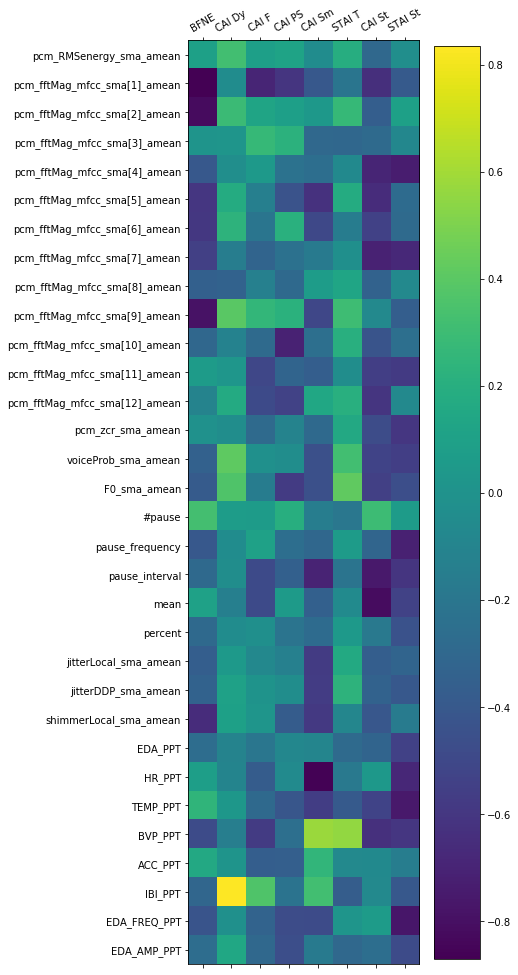

In [144]:
import matplotlib as plt

short_y_col = ["BFNE", "CAI Dy", "CAI F", "CAI PS", "CAI Sm", "STAI T", "CAI St", "STAI St"]

fig = plt.pyplot.figure(figsize=(12,17))
ax = fig.add_subplot(111)
p = ax.matshow(corr_df)
fig.colorbar(p)
ax.set_xticklabels(labels=[''] + short_y_col)  
ax.set_yticklabels(labels=[''] + x_columns.to_list()) # quirk with matplotlib, adding blank label to get them to line up
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
ax.yaxis.set_major_locator(plt.ticker.MultipleLocator(1))
plt.pyplot.show()

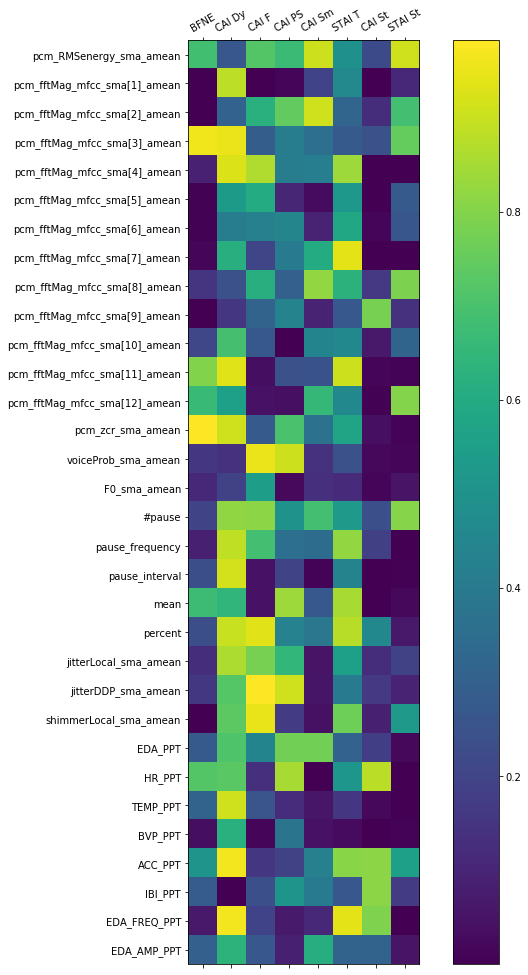

In [145]:
fig = plt.pyplot.figure(figsize=(12,17))
ax = fig.add_subplot(111)
p = ax.matshow(pval_df)
fig.colorbar(p)
ax.set_xticklabels(labels=[''] + short_y_col)  
ax.set_yticklabels(labels=[''] + x_columns.to_list()) # quirk with matplotlib, adding blank label to get them to line up
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
ax.yaxis.set_major_locator(plt.ticker.MultipleLocator(1))
plt.pyplot.show()

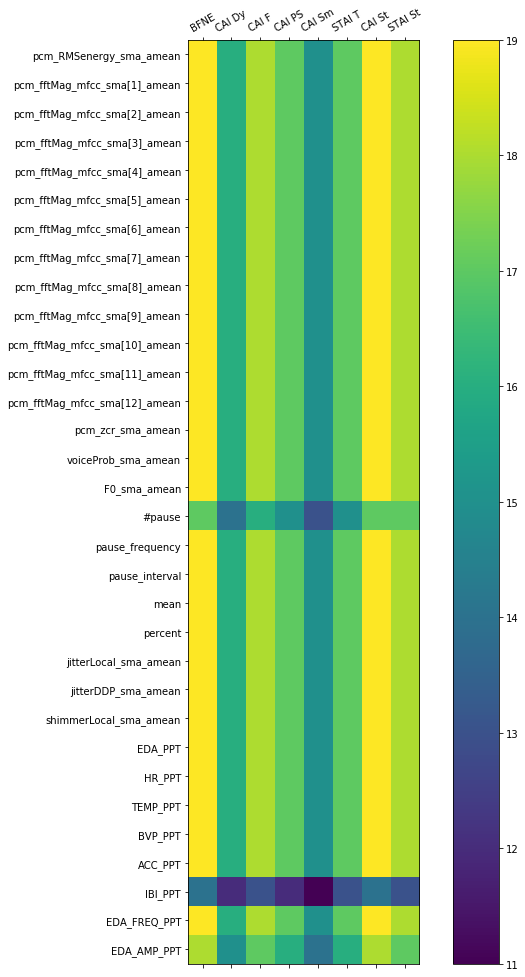

In [146]:
short_y_col = ["BFNE", "CAI Dy", "CAI F", "CAI PS", "CAI Sm", "STAI T", "CAI St", "STAI St"]

fig = plt.pyplot.figure(figsize=(12,17))
ax = fig.add_subplot(111)
p = ax.matshow(num_df)
fig.colorbar(p)
ax.set_xticklabels(labels=[''] + short_y_col)  
ax.set_yticklabels(labels=[''] + x_columns.to_list()) # quirk with matplotlib, adding blank label to get them to line up
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
ax.yaxis.set_major_locator(plt.ticker.MultipleLocator(1))
plt.pyplot.show()

In [104]:
# write to a file (if you want)

corr_df.to_excel(r'/Users/mvonebers/HUBBS-Lab/data/single_feature_corr.xlsx', index='x-value', header=True)
pval_df.to_excel(r'/Users/mvonebers/HUBBS-Lab/data/single_feature_pval.xlsx', index='x-value', header=True)

In [147]:
def get_combo_predictions(X0):
    predicted = [0] * len(X0)

    for y_col, y_i in zip(y_columns, range(len(y_columns))):
        y0 = all_slopes[y_col].to_numpy(copy=True)
        X = np.array([X0[0]])
        y = np.array(y0[0])
        for i in range(1,len(X0)):  # remove NaN from data
            nan = False
            for x_val in X0[i]:
                if math.isnan(x_val):
                    nan = True
                    break
            if not nan and not math.isnan(y0[i]):
                X = np.append(X, [X0[i]], axis=0)
                y = np.append(y, y0[i])

        folds = min(10, len(X))
        model = LinearRegression()
        cv = KFold(folds, shuffle=True, random_state=42)
        predicts = cross_val_predict(model, X, y, cv=cv)

        predicted_vals0 = predicts
        actual_vals0 = all_slopes[y_col]
        predicted_vals = []
        actual_vals = []

        for j in range(len(predicted_vals0)):
            if not math.isnan(predicted_vals0[j]) and not math.isnan(actual_vals0[j]):
                predicted_vals.append(predicted_vals0[j])
                actual_vals.append(actual_vals0[j])

        correlation = np.corrcoef(predicted_vals, actual_vals)[0][1]
        pval = stats.pearsonr(predicted_vals, actual_vals)
        #to_print = str(correlation) + str(pval)
        if correlation > 0.3: 
            if not folds == 10:
                print("With # KFolds", folds)
            print("{0}:\t{1}\t{2} {3}".format(y_col, pval, "Rows:", len(y)))
        
        
print("pcm_fftMag_mfcc_sma[x]_amean 1 through 12")
X0_fftMag = all_slopes[all_slopes.columns[2:14]].to_numpy(copy=True)
get_combo_predictions(X0_fftMag)

print()

print("#pause, pause_frequency, pause_interval")
X0_pauses = all_slopes[all_slopes.columns[17:20]].to_numpy(copy=True) # #pause, pause_frequency, pause_interval
get_combo_predictions(X0_pauses)

print()

print("jitterLocal_sma_amean, shimmerLocal_sma_amean")
X0_jitter = all_slopes[all_slopes.columns[22:24]].to_numpy(copy=True)
get_combo_predictions(X0_jitter)

print()

print("All biological scores (EDA_PPT, etc.)")
X0_eda = all_slopes[all_slopes.columns[23:30]].to_numpy(copy=True)
get_combo_predictions(X0_eda)

print()

print("Bio factors + pcm_fftMag_mfcc_sma[x]_amean 1 through 12")
columns = all_slopes.columns[2:14].to_list() + all_slopes.columns[23:30].to_list()
X0_bio_mfcc = all_slopes[columns].to_numpy(copy=True)
get_combo_predictions(X0_bio_mfcc)
print()

X0_eda = all_slopes[all_slopes.columns[23:30]]
for i in range(14, 24):
    col = all_slopes.columns[i]
    print("Bio factors +", col)
    columns = all_slopes.columns[23:30].to_list() + [col]
    X0_eda = all_slopes[columns].to_numpy(copy=True)
    get_combo_predictions(X0_eda)
    print()

pcm_fftMag_mfcc_sma[x]_amean 1 through 12
CAI Trait Dyadic Score:	(0.5572775432797993, 0.038420875240484056)	Rows: 16
CAI Trait Public Speaking Score:	(0.3805721716714654, 0.16169112621490236)	Rows: 17
STAI State Score:	(0.6863231677313673, 0.0016591412771366533)	Rows: 18

#pause, pause_frequency, pause_interval
Brief fear of Negative Evaluation:	(0.3036529117356245, 0.23607096960074517)	Rows: 17

jitterLocal_sma_amean, shimmerLocal_sma_amean

All biological scores (EDA_PPT, etc.)
STAI Trait Score:	(0.38183286720734644, 0.1601910581906515)	Rows: 17

Bio factors + pcm_fftMag_mfcc_sma[x]_amean 1 through 12
CAI Trait Small group Score:	(0.3021637932920992, 0.33979741116538215)	Rows: 15
STAI State Score:	(0.6307695897921932, 0.005005035097955912)	Rows: 18

Bio factors + pcm_zcr_sma_amean

Bio factors + voiceProb_sma_amean

Bio factors + F0_sma_amean

Bio factors + #pause
Brief fear of Negative Evaluation:	(0.326307768611037, 0.20115795441483045)	Rows: 17

Bio factors + pause_frequency

Bio

In [131]:
for i in range(14,24):
    for j in range(25, 33):
        columns = [all_slopes.columns[i], all_slopes.columns[j]]
        print(all_slopes.columns[i], "+", all_slopes.columns[j])
        X0 = all_slopes[columns].to_numpy(copy=True)
        get_combo_predictions(X0)
        print()

pcm_zcr_sma_amean + EDA_PPT

pcm_zcr_sma_amean + HR_PPT
Brief fear of Negative Evaluation:	(0.23560070034174527, 0.3315472535442305)	Rows: 19
STAI Trait Score:	(0.2045482771684532, 0.4646133379141587)	Rows: 17

pcm_zcr_sma_amean + TEMP_PPT
Brief fear of Negative Evaluation:	(0.27646311106168436, 0.25189006101649775)	Rows: 19

pcm_zcr_sma_amean + BVP_PPT
CAI Trait Small group Score:	(0.4393393539222164, 0.15300499375046295)	Rows: 15
STAI Trait Score:	(0.450151486702365, 0.0922342751836243)	Rows: 17

pcm_zcr_sma_amean + ACC_PPT
Brief fear of Negative Evaluation:	(0.24025594856979032, 0.32179942503975)	Rows: 19

pcm_zcr_sma_amean + IBI_PPT
CAI Trait Small group Score:	(0.38518309642413484, 0.3059678060652631)	Rows: 11

pcm_zcr_sma_amean + EDA_FREQ_PPT
STAI Trait Score:	(0.3139187398313879, 0.25452492885369055)	Rows: 17

pcm_zcr_sma_amean + EDA_AMP_PPT

voiceProb_sma_amean + EDA_PPT
CAI Trait Dyadic Score:	(0.2511693164217133, 0.3863922011723669)	Rows: 16

voiceProb_sma_amean + HR_PPT

voi

STAI Trait Score:	(0.44790467312132276, 0.09407196078615887)	Rows: 17

jitterDDP_sma_amean + EDA_AMP_PPT

